# TP1 Prétraitement acoustique et Analyse en Composantes Principales

NOM - PRÉNOM : LABORIE - RÉMI

Déposer le notebook sur moodle à la fin de la séance. 

In [2]:
import numpy as np
import scipy.io.wavfile as wav
from canaux24 import canaux
from scipy import linalg
import matplotlib.pyplot as plt
import random

### Prétraitements élémentaires
Définition de la fonction lecture qui permet de récupérer la matrice des observations.

 ### Traitements : 
 ATTENTION 
 Procéder par étape en écrivant le code dans une cellule et en traçant le résultat dans la cellule suivante 
 Affichage des matices, des vecteurs, de leur taille ceci afin de vérifier la cohérence des résultats. 
 

In [3]:
# Définition de la fonction lecture
chemin_audios = "./Signal/"
def lecture(classe:str, n:int):
    nbs = [i for i in range(100)]
    cans = []
    for i in range(n):
        nb = random.choice(nbs)
        nbs.remove(nb)
        if nb < 10:
            str_nb = "0" + str(nb)
        else:
            str_nb = str(nb)
        nom_fichier = classe + str_nb + ".wav"
        (f_ech, signal) = wav.read(chemin_audios + nom_fichier)
        cans.append(canaux(signal, f_ech))

    return np.array(cans)

def lecture2(classe:str, n:int):
    cans = []
    for i in range(n):
        if i < 10:
            str_nb = "0" + str(i)
        else:
            str_nb = str(i)
        nom_fichier = classe + str_nb + ".wav"
        (f_ech, signal) = wav.read(chemin_audios + nom_fichier)
        cans.append(canaux(signal, f_ech))

    return np.array(cans)

In [4]:
# Lecture des 20 fichiers pour chacune des classes
obsaa = lecture2('aa', 20)
obsuu = lecture2('uu', 20)
obsii = lecture2('ii', 20)
print(obsaa.shape)
print(obsuu.shape)
print(obsii.shape)

(20, 24)
(20, 24)
(20, 24)


In [5]:
# Créer une matrice contenant l'ensemble des observations à traiter
R = np.vstack((obsaa, obsuu, obsii))
print(R.shape)

(60, 24)


In [6]:
# En utilisant les fonctions cov et eig, constituer une matrice de passage qui permette de passer 
# de l'espace de dimension 24 généré par la fonction canaux dans un espace à deux dimensions 
# correspondant aux deux composantes principales.

In [7]:
# Pour cela, 
# 1 - rechercher les deux valeurs propres maximales
def getVpMax(vps, n:int):
    vals = list(vps)
    res = []
    for _ in range(n):
        val = max(vals)
        vals.remove(val)
        res.append(val)
    return res

matrice = np.cov(R.T)
Lambda, v = linalg.eig(matrice)
vps = getVpMax(Lambda, 2)

print("Taille covariance :", matrice.shape)
print("Taille Lambda :", Lambda.shape)
print("Taille vecteurs :", v.shape)
print("Valeurs propres maximales :", vps)
print(v)

Taille covariance : (24, 24)
Taille Lambda : (24,)
Taille vecteurs : (24, 24)
Valeurs propres maximales : [(5295554841433.579+0j), (465469342942.3679+0j)]
[[-4.58258772e-03 -5.87687541e-04  1.03534506e-02  1.64002609e-02
  -1.33960772e-02  1.29936691e-02  1.37387425e-03 -5.05408368e-03
  -1.06158527e-02  7.72427670e-03 -2.70668054e-02  8.57658002e-02
  -7.82236117e-03  6.97944891e-02  1.01853962e-01 -2.09432233e-01
  -2.74490800e-02 -4.52085487e-02 -1.43116279e-01 -5.68069344e-01
  -6.06515752e-01  1.28609136e-01 -4.45212501e-01  5.65625568e-02]
 [-1.55786437e-01 -2.15067311e-01  1.95398337e-01  4.94891564e-01
  -5.21625919e-02  2.85349294e-01  4.64325543e-01  1.28179836e-01
  -9.91292135e-02  2.03672359e-01  8.42073578e-02  4.37662705e-01
   1.35183207e-02 -2.66367174e-02  8.30841488e-02  1.82106037e-01
  -1.83653102e-01 -3.19163806e-02  1.61380333e-02 -2.08417912e-02
   5.44392614e-02  1.74096172e-02  1.75280145e-02  1.68148947e-02]
 [-3.02068036e-01  2.23587692e-02  2.38907107e-01  

In [8]:
# 2-  prendre les vecteurs propres correspondants
def getVecteursCorrespondants(Lamba:list, v:list, vps:list):
    """
    :param lamba: Liste de toutes les valeurs propres
    :param v: Liste de tous les vecteurs propres
    :param vps: Valeurs propres dont on veut trouver les vecteurs propres
    :return:
    """
    res = []
    for vp in vps:
        res.append(v[list(Lamba).index(vp)])
    return np.array(res)

def getIndicesCorrespondants(Lamba:list, vps:list):
    res = []
    for vp in vps:
        res.append(list(Lamba).index(vp))
    return np.array(res)

vecteurs = getVecteursCorrespondants(Lambda, v, vps)
indices = getIndicesCorrespondants(Lambda, vps)
print(vecteurs.shape)
print(indices)

(2, 24)
[0 1]


In [9]:
# 3-  projeter R dans ce nouvel espace
print("Taille de R avant la projection :", R.shape)
R_projete = np.matmul(R, vecteurs.T)
print("R projeté :", R_projete.shape)

Taille de R avant la projection : (60, 24)
R projeté : (60, 2)


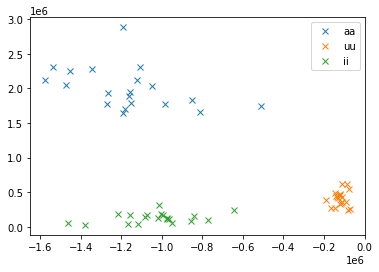

In [10]:
# 4- et effectuer un tracé
# Afficher les nuages de points de chacune des classes de sons sur une même figure en les différenciant 
# par des couleurs ou une forme de tracé de points différentes ; Mettre une légende.

def afficherPoints(mat):
    taille = mat.shape
    n = int(taille[0]/3)
    plt.figure()

    aa = mat[:n, :]
    uu = mat[n:2*n, :]
    ii = mat[2*n:, :]

    plt.plot(aa[:, 0], aa[:, 1], "x")
    plt.plot(uu[:, 0], uu[:, 1], "x")
    plt.plot(ii[:, 0], ii[:, 1], "x")

    plt.legend(["aa", "uu", "ii"])

    plt.show()

afficherPoints(R_projete)

In [11]:
# Utilisez les deux vecteurs propres les moins représentatifs pour la matrice de passage, 
# que devient la représentation des nuages ? Est-ce qu'une discrimination linéaire est possible ?

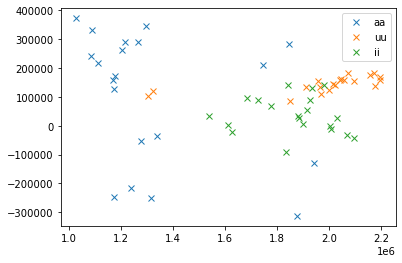

In [12]:
# Pour cela
# 5- rechercher les deux valeurs propres minimales
def getVpMin(vps, n:int):
    vals = list(vps)
    res = []
    for _ in range(n):
        val = min(vals)
        vals.remove(val)
        res.append(val)
    return res

vps_min = getVpMin(Lambda, 2)
vecteurs_min = getVecteursCorrespondants(Lambda, v, vps_min)
indices_min = getIndicesCorrespondants(Lambda, vps_min)

R_projete_min = np.matmul(R, vecteurs_min.T)
afficherPoints(R_projete_min)

### Généralisation
Réaliser le même traitement avec tous les fichiers (100) des 3 classes. Est-ce toujours séparable ?
Effectuer le même traitement sur les 10 voyelles et commenter les résultats... Ajouter les cellules nécessaires.